In [1]:
# importing modules
import numpy as np
import matplotlib.pyplot as plt
import modsim.models.mach_zehnder as mzm
from modsim.signal_gen.arbitrary_generator import SignalGen
import modsim.signal_gen.processing as proc 
%matplotlib inline

In [2]:
# instantiating signal generation
awg = SignalGen(num_of_samples = 256*1024, sampling_time = 25e-5, samples_per_symbol = 4)

# Mach-Zehnder Transfer Functions

C:\Users\lab\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


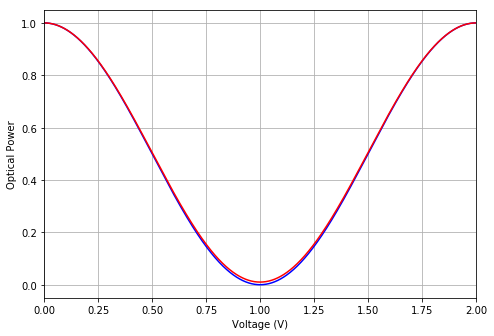

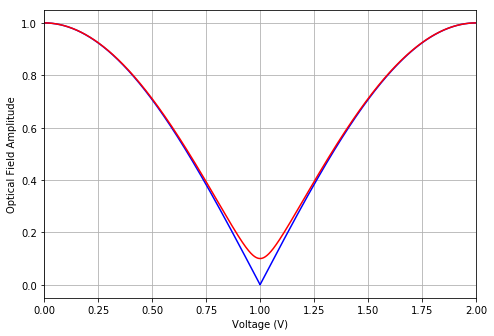

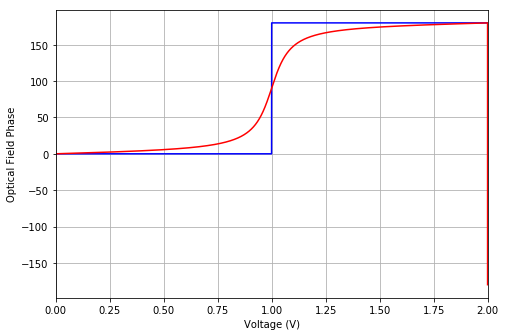

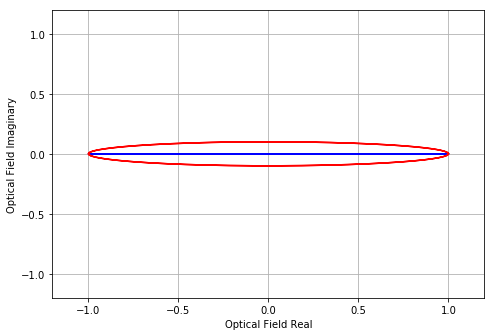

In [3]:
# MZM definitions
Ein = 1
Vrf = 0 * np.linspace(-1, 1, len(awg.time))
Vbias = 4 * np.linspace(-1, 1, len(awg.time))

# modulating w/ infinite ER
Eout = mzm.lin_push_pull(Ein, Vrf, Vbias, 
                         Vpi_rf = 1, 
                         Vpi_bias = 1)

# modulating w/ finite ER
Eout_er = mzm.lin_push_pull(Ein, Vrf, Vbias, 
                         Vpi_rf = 1, 
                         Vpi_bias = 1, 
                         ER_model = 'Finite', 
                         ER_dB = 20)

# PD power
Pout = np.abs(Eout) ** 2
Pout_er = np.abs(Eout_er) ** 2

# plotting field TF and power TF

fig2 = plt.figure()
F2 = fig2.add_axes([0, 0, 1, 1])
F2.plot(Vbias, Pout, 'b-', Vbias, Pout_er, 'r-')
F2.set_xlabel('Voltage (V)')
F2.set_ylabel('Optical Power')
F2.set_xlim([0, 2])
F2.grid('on')

fig3 = plt.figure()
F3 = fig3.add_axes([0, 0, 1, 1])
F3.plot(Vbias, np.abs(Eout), 'b-', Vbias, np.abs(Eout_er), 'r-')
F3.set_xlabel('Voltage (V)')
F3.set_ylabel('Optical Field Amplitude')
F3.set_xlim([0, 2])
F3.grid('on')

fig4 = plt.figure()
F4 = fig4.add_axes([0, 0, 1, 1])
F4.plot(Vbias, (np.angle(Eout) * (180 / np.pi)), 'b-', Vbias, (np.angle(Eout_er) * (180 / np.pi)), 'r-')
F4.set_xlabel('Voltage (V)')
F4.set_ylabel('Optical Field Phase')
F4.set_xlim([0, 2])
F4.grid('on')

fig5 = plt.figure()
F5 = fig5.add_axes([0, 0, 1, 1])
F5.plot(np.real(Eout), np.imag(Eout), 'b-', np.real(Eout_er), np.imag(Eout_er), 'r-')
F5.set_xlabel('Optical Field Real')
F5.set_ylabel('Optical Field Imaginary')
F5.set_xlim(-1.2, 1.2)
F5.set_ylim(-1.2, 1.2)
F5.grid('on')

# Modulation and Bias Dithering

In [24]:
# MZM settings
Ein = 1
Vpi_rf = 1
Vpi_bias = Vpi_rf
ER_model = 'Infinite'
ER_dB = 20

# RF settings
pulse_fmt = 'NRZ' #'PAM4'
Vpp_rf = 0 * Vpi_rf
f_bw = None
f_ord = 2

# bias settings
bias_dc = -2 * Vpi_rf #4 * Vpi_rf * np.linspace(0, 1, len(awg.time)) #-1.2 * Vpi_rf  
Vpp_dither = 0.05 * Vpi_rf
f_dither = 1 #[Hz]

# generating signals
Vrf = awg.pulse_sequence_gen(pulse_fmt, Vpp_rf/2, f_bw = f_bw, f_order = f_ord) # [1 kbaud]
Vbias = bias_dc + awg.waveform_gen(Vpp_dither/2, f_dither, 0)
Vramp = 4 * Vpi_rf * np.linspace(-1, 1, len(awg.time))

# modulating RF and bias
Eout = mzm.lin_push_pull(Ein, Vrf, Vbias, 
                         Vpi_rf = Vpi_rf, 
                         Vpi_bias = Vpi_bias, 
                         ER_model = ER_model, 
                         ER_dB = ER_dB)

# modulating ramp (tramsmittance reference curve)
TE = mzm.lin_push_pull(Ein, Vramp, np.zeros(Vramp.size), 
                         Vpi_rf = Vpi_rf, 
                         Vpi_bias = Vpi_bias, 
                         ER_model = ER_model, 
                         ER_dB = ER_dB)

# modulating bias only
Ebias = mzm.lin_push_pull(Ein, np.zeros(Vbias.size), Vbias, 
                         Vpi_rf = Vpi_rf, 
                         Vpi_bias = Vpi_bias, 
                         ER_model = ER_model, 
                         ER_dB = ER_dB)

# PD power
Pout = np.abs(Eout) ** 2
TP = np.abs(TE) ** 2
Pbias = np.abs(Ebias) ** 2

# PD spectrum
Pout_f = np.fft.fftshift(np.fft.fft(Pout)) 

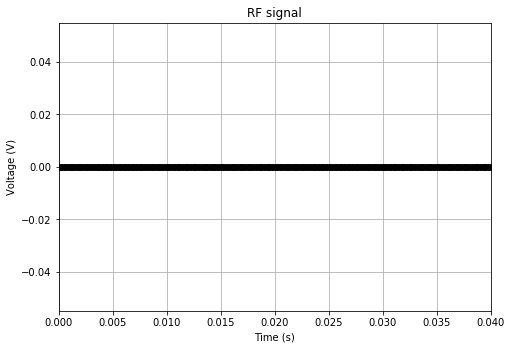

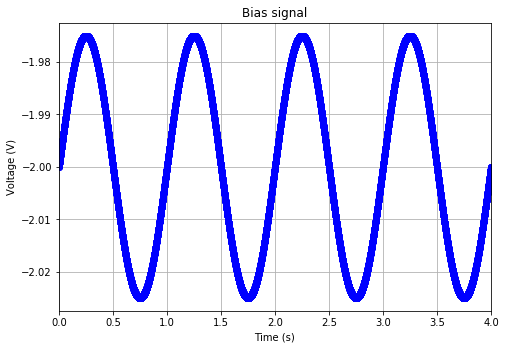

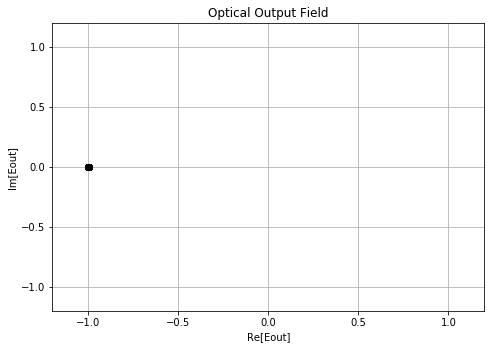

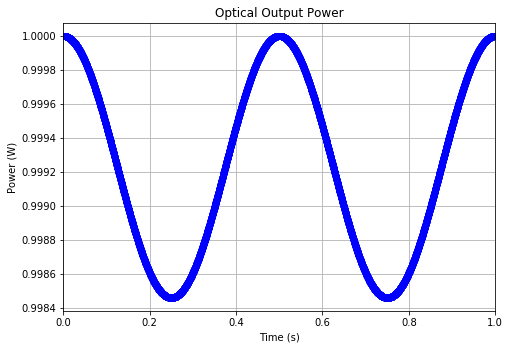

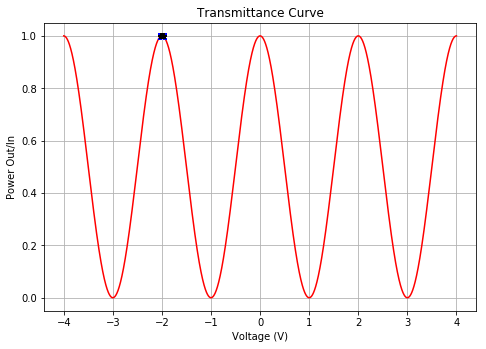

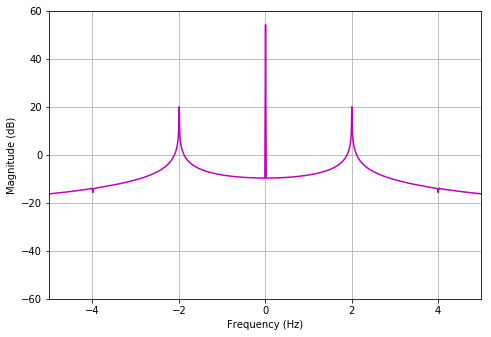

In [27]:
# plotting RF

fig7 = plt.figure()
F7 = fig7.add_axes([0,0,1,1])
F7.plot(awg.time, Vrf, 'ko-')
F7.set_xlabel('Time (s)')
F7.set_ylabel('Voltage (V)')
F7.set_xlim(0, 4e-2)
F7.set_title('RF signal')
F7.grid('on')

fig8 = plt.figure()
F8 = fig8.add_axes([0,0,1,1])
F8.plot(awg.time, Vbias, 'bo-')
F8.set_xlabel('Time (s)')
F8.set_ylabel('Voltage (V)')
F8.set_title('Bias signal')
F8.set_xlim(0, 4)
F8.grid('on')

# plotting field TF and power TF

fig6 = plt.figure()
F6 = fig6.add_axes([0,0,1,1])
F6.plot(np.real(Eout),np.imag(Eout),'ko')
F6.set_xlabel('Re[Eout]')
F6.set_ylabel('Im[Eout]')
F6.set_title('Optical Output Field')
F6.set_xlim(-1.2,1.2)
F6.set_ylim(-1.2,1.2)
F6.grid('on')

fig9 = plt.figure()
F9 = fig9.add_axes([0,0,1,1])
F9.plot(awg.time, Pout, 'bo-')
F9.set_xlabel('Time (s)')
F9.set_ylabel('Power (W)')
F9.set_title('Optical Output Power')
F9.set_xlim(0, 1)
F9.grid('on')

fig10 = plt.figure()
F10 = fig10.add_axes([0,0,1,1])
F10.plot(Vramp, TP, 'r-', Vbias, Pbias, 'bx', Vbias + Vrf, Pout, 'k*')
F10.set_xlabel('Voltage (V)')
F10.set_ylabel('Power Out/In')
F10.set_title('Transmittance Curve')
#F10.set_xlim(0, 1)
F10.grid('on')

fig11 = plt.figure()
F11 = fig11.add_axes([0,0,1,1])
F11.plot(awg.frequency, 10 * np.log10(abs(Pout_f)), 'm-')
F11.set_xlabel('Frequency (Hz)')
F11.set_ylabel('Magnitude (dB)')
F11.set_xlim([-5,5])
F11.set_ylim([-60,60])
F11.grid('on')

In [10]:
(Pout_ac, Pout_dc) = proc.dc_window(Pout, 1024)

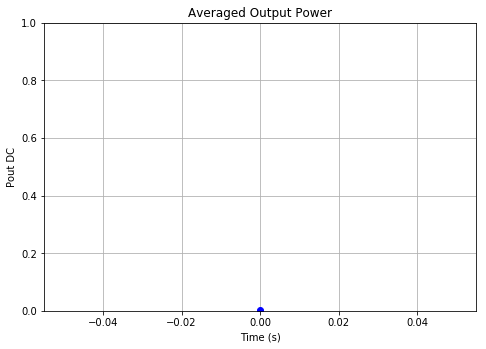

In [11]:
fig10 = plt.figure()
F10 = fig10.add_axes([0,0,1,1])
F10.plot(np.arange(Pout_dc.size), Pout_dc, 'bo-')
F10.set_xlabel('Time (s)')
F10.set_ylabel('Pout DC')
F10.set_title('Averaged Output Power')
#F10.set_xlim(0, 10)
F10.set_ylim(0, 1)
F10.grid('on')

In [13]:
Pout_dc.size

256

# Sweeping Bias

In [ ]:
def moving_avg(a, n = 3):
    ret = np.cumsum(a, dtype = float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n

In [ ]:
# mPD/Analog filtering
Vout = awg.gaussian_filter(Pout,50,4)

# applying moving average
window_size = 1024*10
Vout_avg = moving_avg(Vout.real, n = window_size)

In [ ]:
fig10 = plt.figure()
F10 = fig10.add_axes([0,0,1,1])
F10.plot(awg.time[:-window_size+1], Vout_avg, 'bo-')
F10.set_xlabel('Time (s)')
F10.set_ylabel('mPD')
F10.set_title('Averaged Output Power')
#F10.set_xlim(0, 10)
F10.set_ylim(0, 1)
F10.grid('on')

fig11 = plt.figure()
F11 = fig11.add_axes([0,0,1,1])
F11.plot(bias_dc[:-window_size+1], Vout_avg, 'bo-')
F11.set_xlabel('Bias DC (V)')
F11.set_ylabel('mPD')
F11.set_title('Averaged Output Power')
#F11.set_xlim(0, 0.5)
F11.set_ylim(0, 1)
F11.grid('on')

In [ ]:
vpprf_2 = Vout_avg

In [ ]:
fig12 = plt.figure()
F12 = fig12.add_axes([0,0,1,1])
F12.plot(bias_dc[int(window_size/2)-1:int(-window_size/2)], vpprf_0, 
         bias_dc[int(window_size/2)-1:int(-window_size/2)], vpprf_1,
         bias_dc[int(window_size/2)-1:int(-window_size/2)], vpprf_2)
F12.set_xlabel('Bias DC (V)')
F12.set_ylabel('Average mPD Response')
F12.set_title('Averaged Output Power ')
F12.legend(['Vpp RF = 0', 'Vpp RF = Vpi', 'Vpp RF = 2Vpi'])
#F12.set_xlim(0, 0.5)
F12.set_ylim(0, 1)
F12.grid('on')

In [ ]:
window_size